# MATH 3480 - Machine Learning
# 07 Support Vector Machines (SVMs)

## Reading
* Geron, Chapter 5
* Brunton, Section 5.7 [Video](https://www.youtube.com/watch?v=NOKOJWQ2_iE)

__Additional Helps__
* [MIT OCW Support Vector Machines](https://www.youtube.com/watch?v=_PwhiWxHK8o)
* [https://www.youtube.com/watch?v=IOetFPgsMUc](https://www.youtube.com/watch?v=IOetFPgsMUc)

## Uses
* Classification
* Regression

## How it works
Support vector machines (SVMs) are supervised learning models that perform linear or nonlinear classification, regression, and outlier detection. They work best for complex but small- or medium-sized datasets. Smaller datasets give more accurate models (to a point...).

An SVM recognizes patterns that can be used to determine a separation between data and categorize new data based on which side of the gap they fall on. The goal is to make the gap as wide as possible to create very distinct categories.

If the data can be separated into two groups, we determine a line that separates the two groups. This line is called a __hyperplane__, and is a line in 2D, or a surface in 3D. Some lines will be next to both groups, but if we get the right slope, then the margins between the line and the closest datapoints is maximized. 

We also create lines to act as margins around the separation line. The points that lie on the margin lines are called __support vectors__.

Hyperparameters adjust the width of the margins.
* `C`
  * If `C` is low, then the variance is high (wide margins)

### Soft Margin Classification
Ideally, we want a clearly defined margin, with one category on one side of one margin, and another category on the other side of the other margin. This is a __hard margin__. 

In some 

### Kernels
Sometimes, the two variables are not linearly separable.
* Consider a group collected around the origin, and another group forming a circle around the inner group.

To resolve this, we add a third variable, which creates a third dimension. Usually the 3D data can then be separated by a plane. When this plane is translated back into 3D, it becomes an elliptical or circular line.

## Theory
### Linear SVM
#### Goal
We need to draw a line between the two sets of data. We start with a vector $\vec{w}$ which points to and is perpendicular to the line. We can take a dot product of $\vec{w}$ with the vector for each point to create a projection. Or, we create a line perpendicular to $\vec{w}$ that goes through each point:
$$f(x)=\vec{w}\cdot\vec{x}+b = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$
We are going to define $f(x)=0$ to be the line that separates the groups. We'll call each point in the two groups $x_+$ and $x_-$. Further, we'll make the condition that if we want a point to be in the + group, it must satisfy:
$$\vec{w}\cdot\vec{x} + b \ge 0\tag{1}$$

This is known as the __Decision Rule__.

#### Determine the Margins
* $\vec{w}\cdot\vec{x}_+ +b>+1$ is on one side of the line
* $\vec{w}\cdot\vec{x}_- +b<-1$ is on the other side
  * For Hard Margin Classification, there will be no datapoints between $f(x)=+1$ and $f(x)=-1$. This region is the __margin__.
  * Points on $f(x_+)=+1$ and on $f(x_-)=-1$ are __Support Vectors__.
  
For convenience, let's define a new variable $y_i$ such that,
* $y_i=+1$ for a + sample
* $y_i=-1$ for a - sample

Then, 
$$y_i(\vec{w}\cdot\vec{x}_+ +b)\ge +1 \qquad y_i(\vec{w}\cdot\vec{x}_- +b)\ge +1$$
$$y_i(\vec{w}\cdot\vec{x}_i +b) - 1 = 0~~~~\text{ for }x_i\text{ in the gutter}\tag{2}$$

#### Margin Width
Take any two support vectors, $x_+$ and $x_-$. Their difference $x_+-x_-$ creates a vector going across the margin. If we take a dot product of this difference with a unit vector parallel to the lines, then we have the margin width.
$$M = (\vec{x}_+ - \vec{x}_-)\cdot \frac{\vec{w}}{||w||}$$

Combining this with (2)
$$y_i(\vec{w}\cdot\vec{x}_+ + b) - 1 = 0\text{ (recall, }y_i=+1) \qquad\to\qquad \vec{w}\cdot\vec{x}_+ = 1-b$$
$$y_i(\vec{w}\cdot\vec{x}_- + b) - 1 = 0\text{ (recall, }y_i=-1) \qquad\to\qquad \vec{w}\cdot\vec{x}_- = 1+b$$
$$(\vec{x}_+ - \vec{x}_-)\cdot \frac{\vec{w}}{||w||} \qquad\to\qquad \left((1-b)-(1+b)\right)\frac{1}{||w||} = \frac{2}{||w||}$$

So, our margin width is the maximum $\frac{2}{||w||}$, so we want the minimum $||w||$. For convenience,
$$\min ||w|| = \min \frac{1}{2}||w||^2\tag{CHECK THIS}$$

To solve this, we use Lagrange multipliers. Let $L=\frac{1}{2}||\vec{w}||^2-\sum \alpha_i\left[y_i(\vec{w}\cdot\vec{x}_i+b)-1\right]$. To find an extremum, set up a derivative and set it equal to 0.
$$\frac{\partial L}{\partial\vec{w}} = \vec{w} - \sum \alpha_i y_i \vec{x_i} = 0 \qquad \implies \qquad \vec{w} = \sum_i \alpha_i y_i \vec{x_i}\tag{3}$$
$$\frac{\partial L}{\partial b} = -\sum_i \alpha_i y_i = 0 \qquad\implies\qquad \sum_i \alpha_i y_i = 0$$

Plug (3) back into $L$.
$$L=\frac{1}{2}\left(\sum \alpha_i y_i \vec{x}_i\right)\cdot\left(\sum\alpha_j y_j \vec{x}_j\right) - \left(\sum \alpha_i y_i \vec{x}_i\right)\cdot \left(\sum \alpha_j y_j \vec{x}_j\right) - \sum \alpha_i y_i b + \sum \alpha_i$$
$$=\sum \alpha_i - \frac{1}{2}\sum_i \sum_j \alpha_i\alpha_jy_iy_j\vec{x}_i\cdot\vec{x}_j\tag{4}$$

The optimization only depends on $\vec{x}_i\cdot\vec{x}_j$

#### Kernel Trick
Create a transformation $\Phi(\vec{x})$. This will transform it to another space. Then, we just need to maximize the kernel $K(\vec{x}_i,\vec{x}_j)=\Phi(\vec{x}_i)\cdot \Phi(\vec{x}_j)$.

These were discovered in the 1960's, but the inventor in Russia didn't have computers. Emigrated to U.S. in 1991, proposed papers on SVMs that were rejected. A few years later, tried it on Letter Recognition, and it worked beautifully.

## How to use it
* Load data
* Create plots to get insights into the best way to classify the data
* Create Train and Test sets
* Load the model
* Create a fit
* Make predictions
* Fine-tune the predictions

Let's try this with the dataset for iris plants.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [2]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
species = pd.DataFrame(iris_data['target'], columns=['species_num'])

In [3]:
def test_iris(x):
    if x==0: return "setosa"
    if x==1: return "versicolor"
    if x==2: return "virginica"

iris['species'] = species['species_num'].apply(lambda x: test_iris(x))

In [4]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


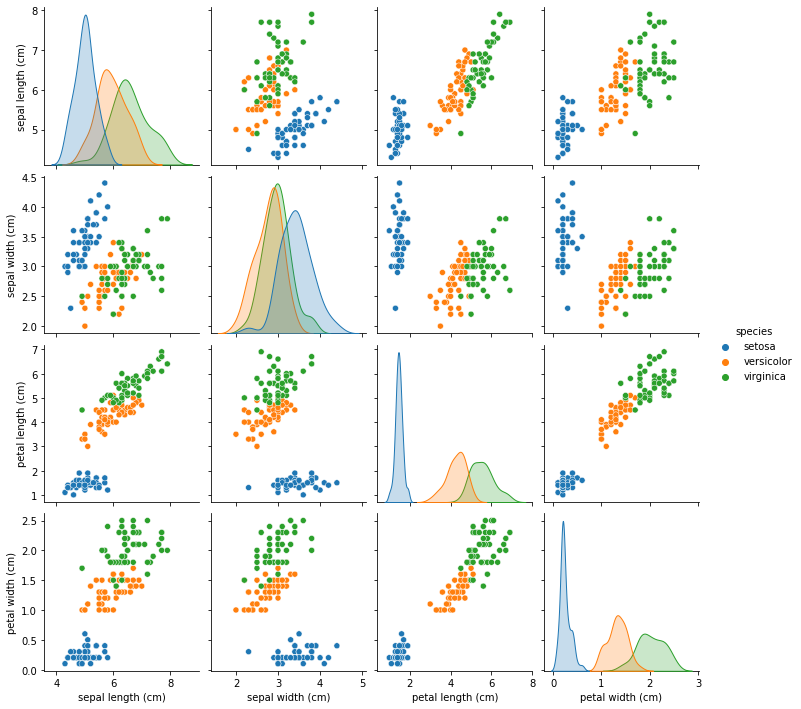

In [5]:
sns.pairplot(iris, hue='species')

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(['species'],axis=1), iris['species'], test_size=0.3, random_state=32)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

X = iris.drop(['species'], axis=1)
y = iris['species']

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

In [8]:
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [9]:
y_predict = svm_clf.predict(X_train)

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train,y_predict))

[[31  0  0]
 [ 0 33  5]
 [ 0  2 34]]


In [11]:
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        31
  versicolor       0.94      0.87      0.90        38
   virginica       0.87      0.94      0.91        36

    accuracy                           0.93       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.93      0.93       105



## Example using a Kernel Trick

<AxesSubplot:>

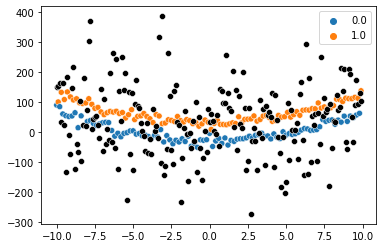

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dx = 0.1
x = np.arange(-10,10,dx)
r = 10*np.random.randn(len(x))
s = np.zeros_like(r)

for i in range(len(r)):
    s[i] = np.mod(i,2)
    r[i] = r[i] + 30*(2*s[i]-1)

y_train = x**2 + r
y_test = x**2 + r + 100*np.random.randn(len(x))
sns.scatterplot(x = x, y = y_train, hue=s)
sns.scatterplot(x = x, y = y_test,  color='k')

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=2, coef0=1, C=5))
  ])
svm_poly.fit(np.transpose([x,y_train]),s)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=2, kernel='poly'))])

In [14]:
s_poly = svm_poly.predict(np.transpose([x,y_test]))

<AxesSubplot:>

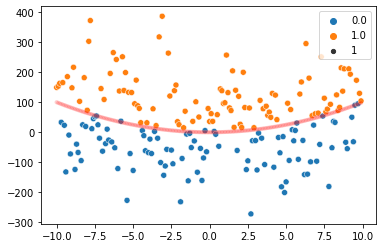

In [15]:
sns.scatterplot(x = x,y = y_test, hue=s_poly)
sns.scatterplot(x = x,y = x**2,   color='r', size=1,alpha=0.2)

<AxesSubplot:>

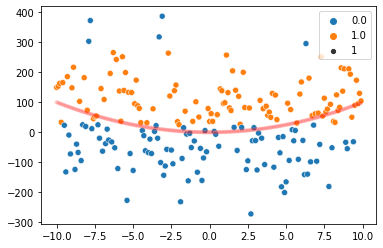

In [16]:
svm_gauss = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=0.1, C=0.1))
  ])
svm_gauss.fit(np.transpose([x,y_train]),s)

s_gauss = svm_gauss.predict(np.transpose([x,y_test]))
sns.scatterplot(x = x,y = y_test, hue=s_gauss)
sns.scatterplot(x = x,y = x**2,   color='r', size=1,alpha=0.2)

## SVM Regression

SVM work for both Classification and Regression. To do regression, we reverse the process. Instead of trying to find a margin to separate data (keepin the gap clear), we want to get as many points as possible *inside* the margin.

In [43]:
from sklearn.svm import LinearSVR
dx = 0.014
x = np.arange(-1,5,dx)
y = 5*x - 4 + 5*np.random.random(len(x))

In [50]:
st_x = StandardScaler()
st_y = StandardScaler()

X = st_x.fit_transform(np.transpose([x]))
Y = st_y.fit_transform(np.transpose([y]))

svm_reg = LinearSVR(random_state=3, epsilon=1.5)
svm_reg.fit(np.transpose([x]),y)

reg_coefficient = svm_reg.coef_
reg_intercept = svm_reg.intercept_

y_predict = svm_reg.coef_ * x + svm_reg.intercept_

print(svm_reg.coef_)
print(svm_reg.intercept_)

[5.08761427]
[-1.64337414]


<AxesSubplot:>

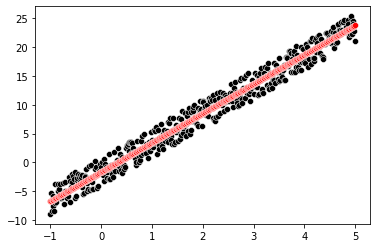

In [51]:
sns.scatterplot(x = x, y = y, color = 'k')
sns.scatterplot(x = x, y = y_predict, color = 'r')

### Nonlinear SVR

We can still use a kernel trick to solve a nonlinear regression problem.

In [20]:
x = np.arange(-1,5,dx)
y = 5*x*x - 4

svm_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("lsvr", SVR(kernel="poly", degree=2, C=random_state=3, epsilon=1.5))
    ])

svm_reg.fit(np.transpose([x]),y)
print(svm_reg.named_steps['lsvr'].coef_)
print(svm_reg.named_steps['lsvr'].intercept_)

SyntaxError: invalid syntax (1517697007.py, line 6)